In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm # progress bar
tqdm.pandas()

from molecules_clustering import Butina_clustering
#from diversesubset import distance_maxtrix, diverse_subset
#from cluster_visualize import cluster_heat_map, cluster_scatter_plot

#sys.path.append('./MolecularClustering/ultility')
from standardize import standardization

reading NP model ...
model in


In [6]:
data = pd.read_csv("/Users/thechuongtrinh/Documents/Workspace/Master_thesis/Cdr1/MolCluster/data_standardize_0902.csv")
data.head()

,ID,Canonical_smiles,Title,Activity,Reference
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,Active,https://doi.org/10.1016/j.bbrc.2005.03.009
1,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
2,WK14B,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,Styrylquinolines,Active,https://doi.org/10.1016/j.ijantimicag.2017.01.044
3,WK15,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Inactive,https://doi.org/10.1016/j.ijantimicag.2017.01.044
4,WK15B,CC(=O)Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,Inactive,https://doi.org/10.1016/j.ijantimicag.2017.01.044


In [7]:
#Binary Activity
#if Active -> 1, Inactive -> 0 
data['Activity'] = data['Activity'].apply(lambda x: 1 if x == 'Active' else 0)
data.head()

,ID,Canonical_smiles,Title,Activity,Reference
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,1,https://doi.org/10.1016/j.bbrc.2005.03.009
1,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,1,https://doi.org/10.1016/j.ijantimicag.2017.01.044
2,WK14B,CC(=O)Oc1ccccc1/C=C/c1ccc2cccc(OC(C)=O)c2n1,Styrylquinolines,1,https://doi.org/10.1016/j.ijantimicag.2017.01.044
3,WK15,Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,0,https://doi.org/10.1016/j.ijantimicag.2017.01.044
4,WK15B,CC(=O)Oc1cccc(/C=C/c2ccc3cccc(O)c3n2)c1,Styrylquinolines,0,https://doi.org/10.1016/j.ijantimicag.2017.01.044


### **Butina clustering**

In [8]:
#Standardization
from rdkit.rdBase import BlockLogs
block = BlockLogs()
std = standardization(data=data,ID='ID', smiles_col='Canonical_smiles', active_col='Activity', ro5 =0)
data_norm = std.filter_data()
data_norm.head(2)

  0%|          | 0/1820 [00:00<?, ?it/s]

  0%|          | 0/1820 [00:00<?, ?it/s]

,ID,Canonical_smiles,Title,Activity,Reference,Canomicalsmiles,Molecule
0,Isonitrile_1,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,Isonitrile_derrivatives,1,https://doi.org/10.1016/j.bbrc.2005.03.009,[C-]#[N+]C1=CC(=CCC(=O)O)CC1,<rdkit.Chem.rdchem.Mol object at 0x289ca3450>
1,WK14,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,Styrylquinolines,1,https://doi.org/10.1016/j.ijantimicag.2017.01.044,Oc1ccccc1/C=C/c1ccc2cccc(O)c2n1,<rdkit.Chem.rdchem.Mol object at 0x289ca34c0>


In [10]:
#Butian Clustering
butina = Butina_clustering(df = data_norm, ID = "ID", smiles_col = "Canomicalsmiles", active_col = 'Activity', 
                             mol_col = 'Molecule', activity_thresh = -1, 
                             dis_cutoff = 0.5, cps = 5)
active_set, cluster_centers,  df_active = butina.data_processing()

total # clusters:  1333
# clusters with only 1 compound:  1185
# clusters with >5 compounds:  31
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0
cluster_centers 31
Silhouette Score: 0.08472099227014304


### **Visualization**

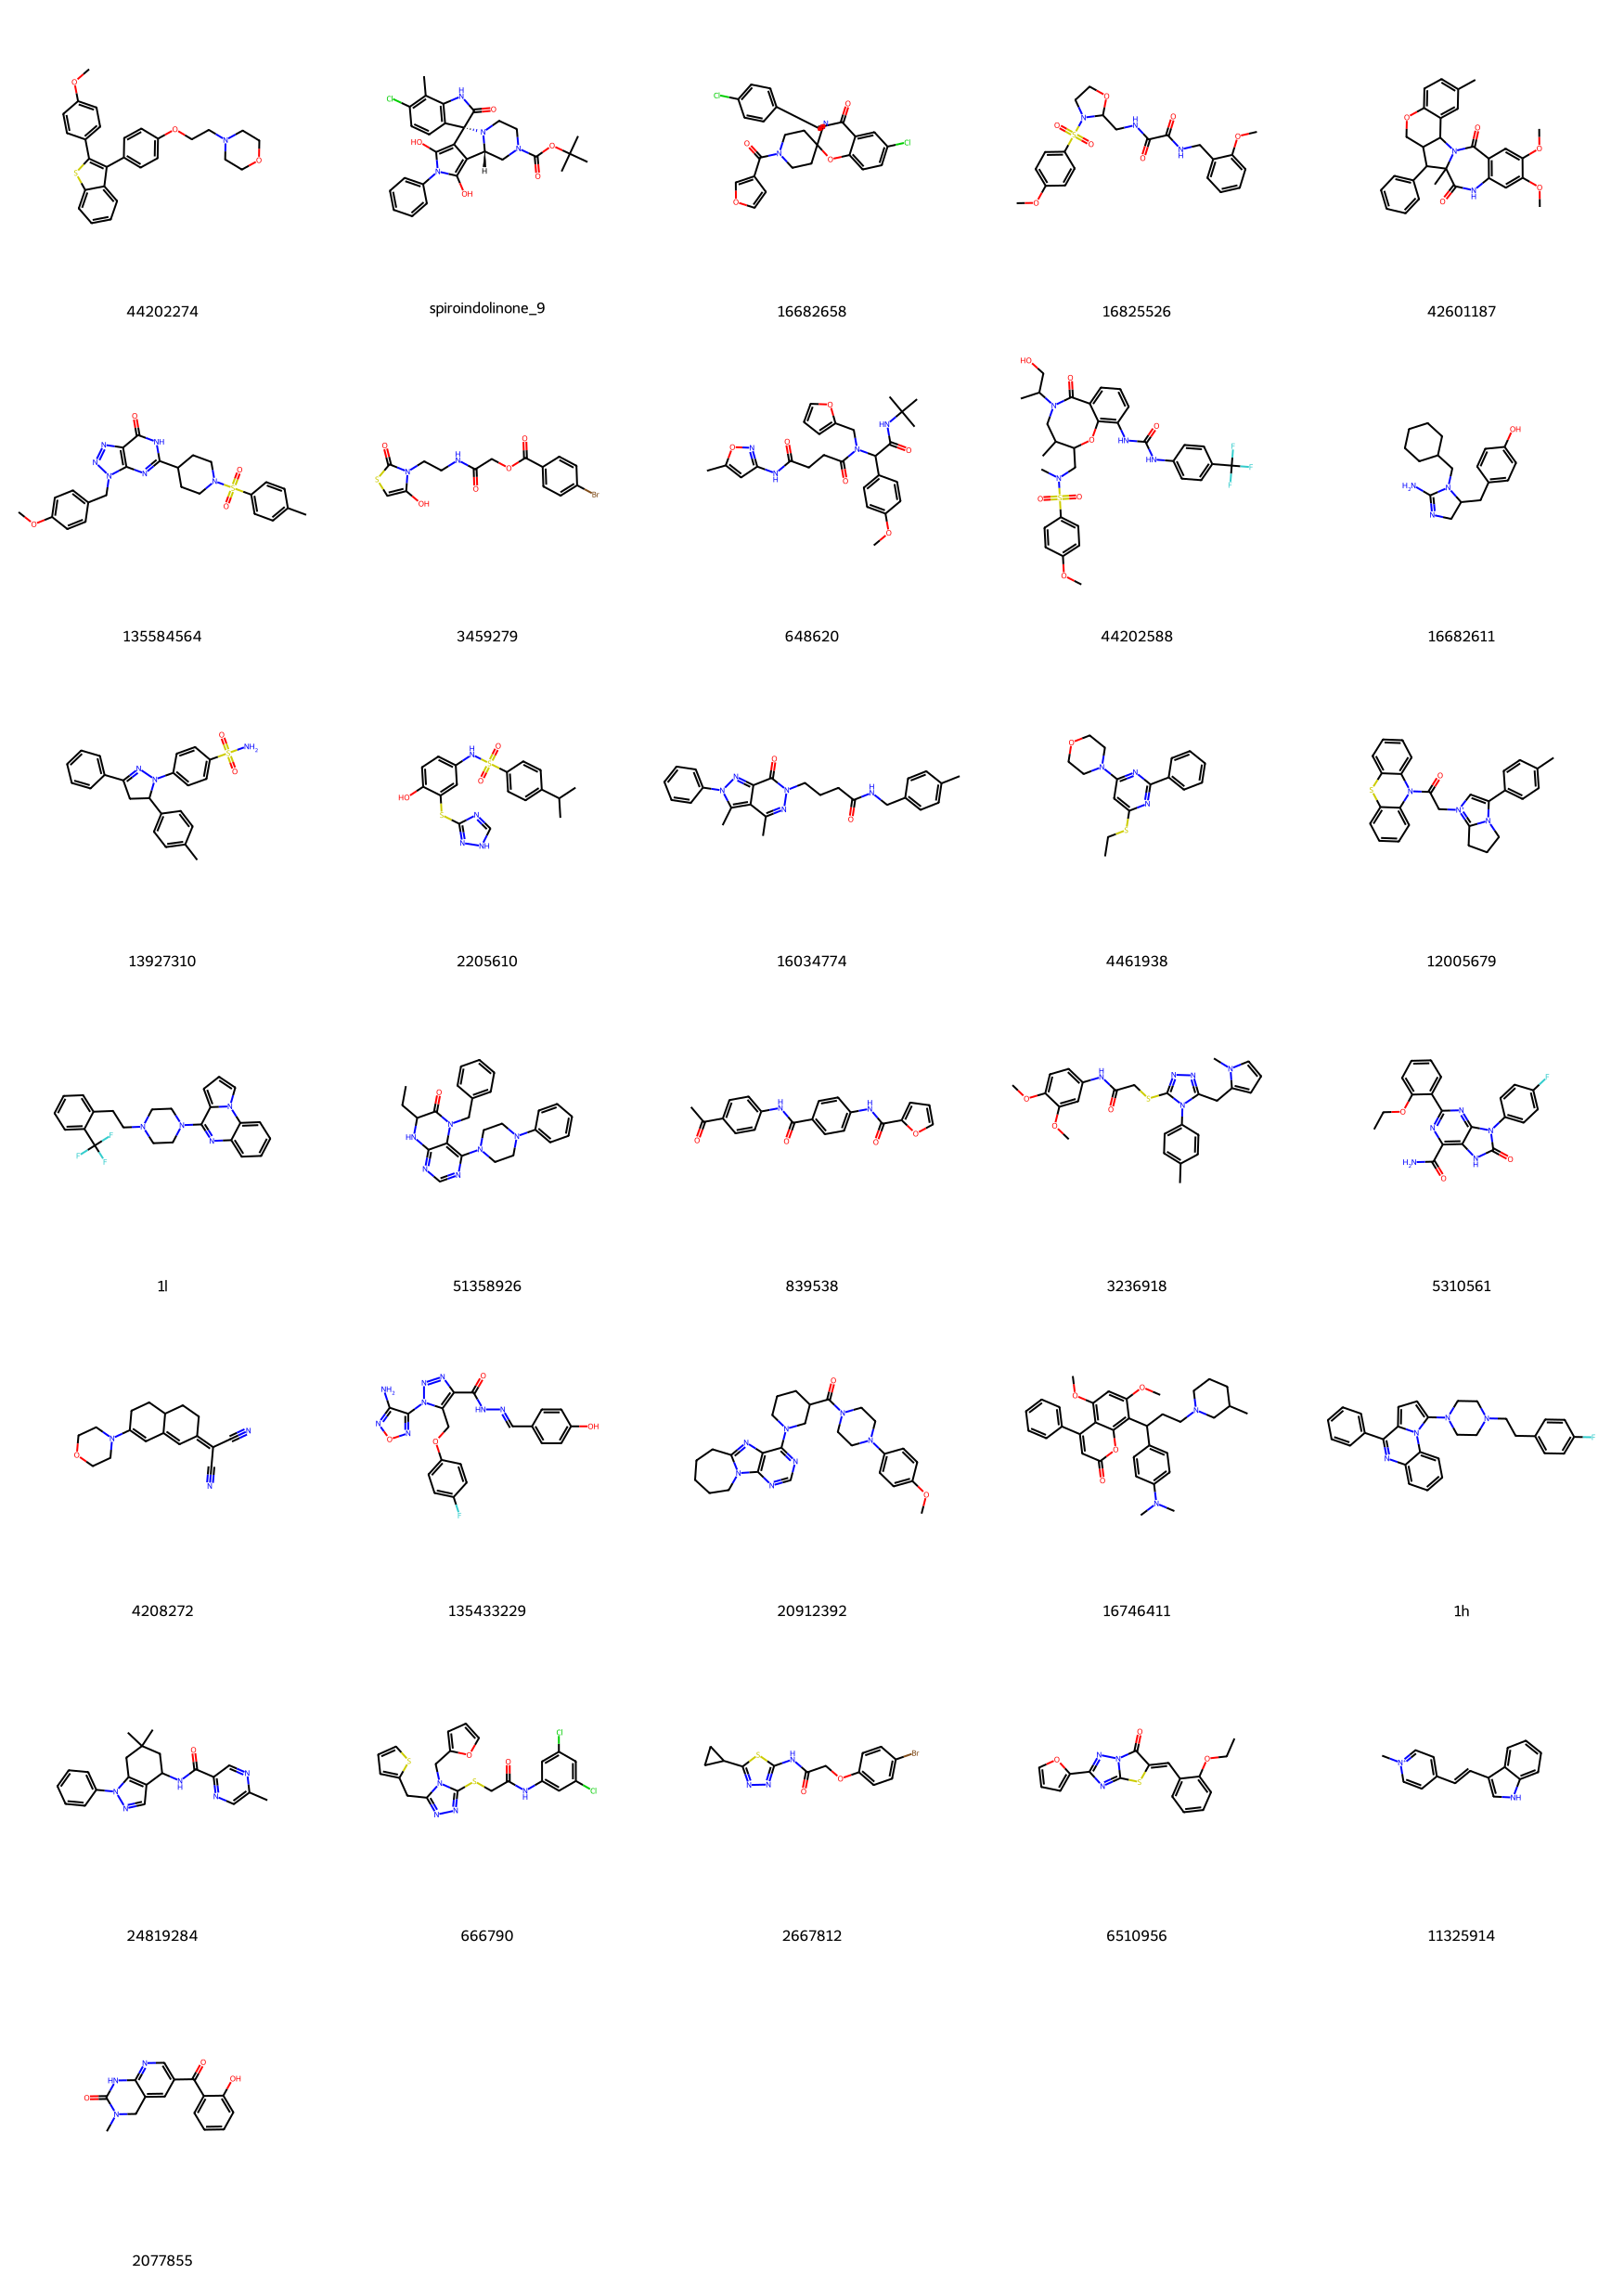

In [13]:
from rdkit import Chem
labels_centroids = []
for i in range(0, len(cluster_centers)):
    names = cluster_centers[i].GetProp("_Name")
    labels_centroids.append(names)

#Visualize centroids

centroids_img = Chem.Draw.MolsToGridImage(cluster_centers, molsPerRow=5, legends=labels_centroids, maxMols=60, subImgSize=(350, 350),returnPNG=False)
centroids_img

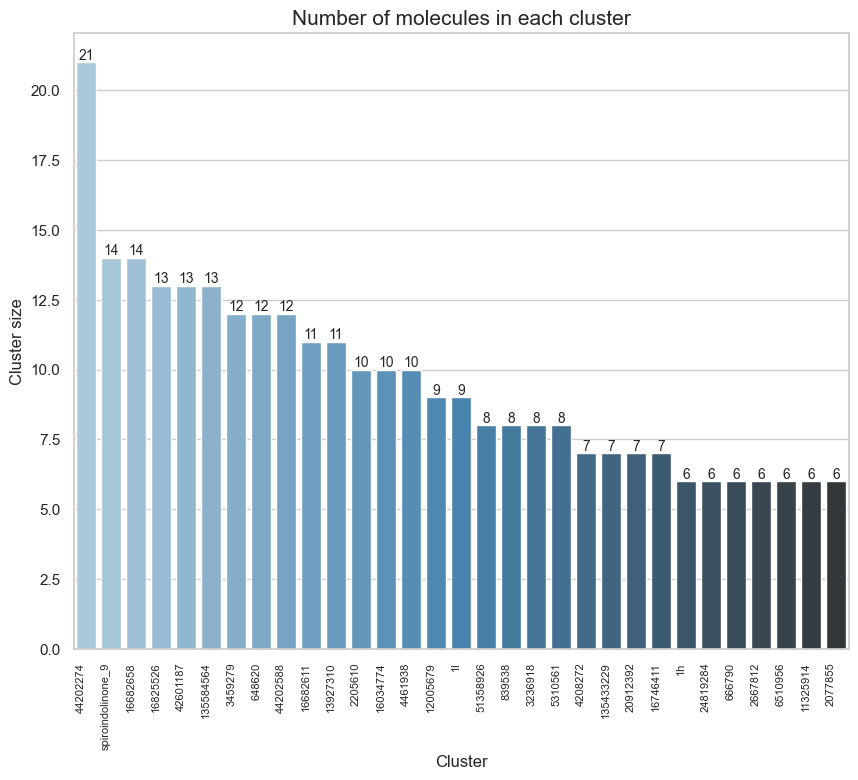

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

cluster_number = df_active['Cluster'].value_counts()
cluster_more_5 = cluster_number[cluster_number > 5]
cluster_more_5.index = labels_centroids

ax = sns.barplot(x=cluster_more_5.index, y=cluster_more_5.values, palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right" ,fontsize=8)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Cluster size', fontsize=12)
plt.title("Number of molecules in each cluster", fontsize=15)

# Add values on top of columns
for i, v in enumerate(cluster_more_5.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

# #Saving
# folder = str('./Cluster_images')
# isExist = os.path.exists(folder)
# if not isExist:
#   os.makedirs(folder)
# save_dir = folder+'/'
# plt.savefig(save_dir+'cluster_size.png', dpi=600, bbox_inches='tight')

plt.show()


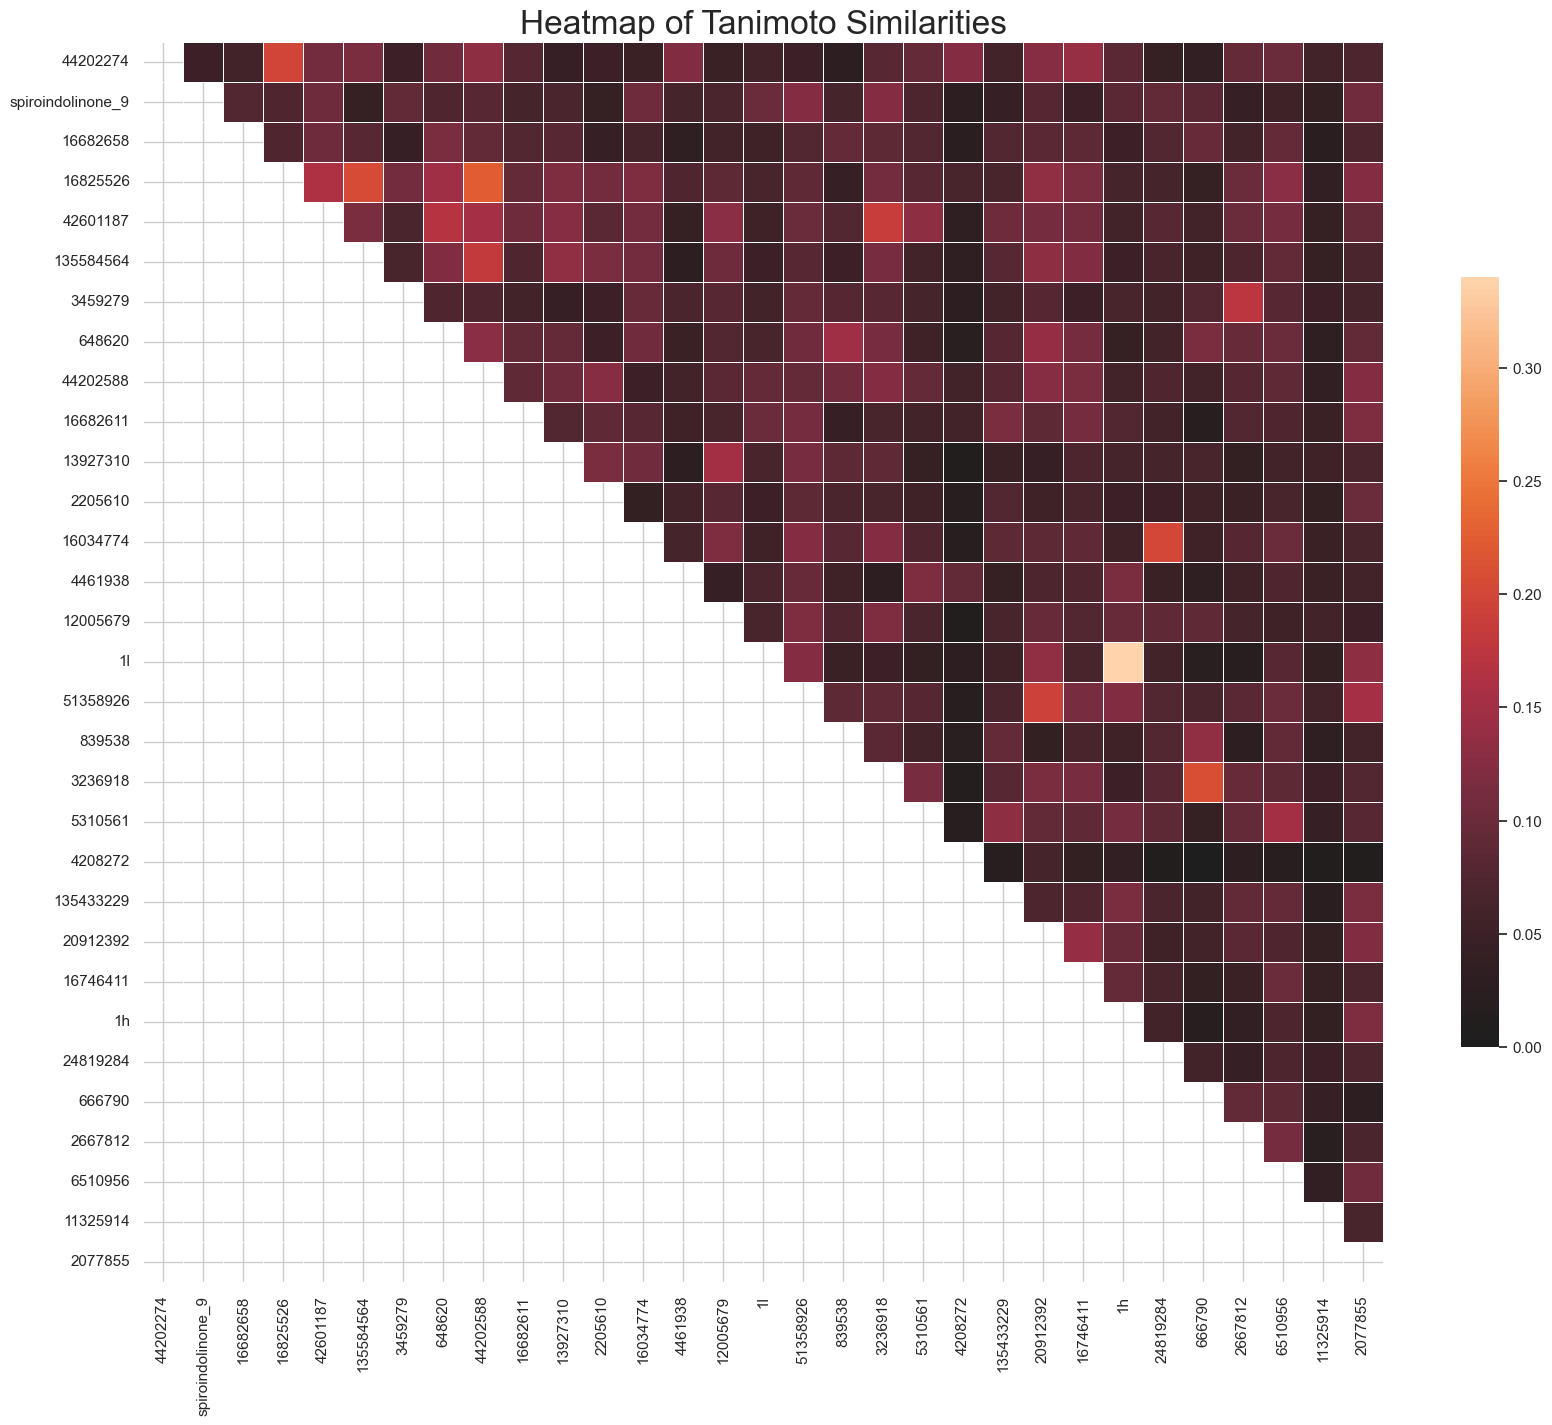

In [15]:
from mhfp.encoder import MHFPEncoder

def tanimoto(vector1, vector2):
        a = np.where(vector1 == 1)[0]
        b = np.where(vector2 == 1)[0]
        tani = len(np.intersect1d(a, b)) / (float(len(a) + len(b)) - len(np.intersect1d(a, b)))
        return tani


def tanimoto_heatmap(data):
    smiles = [Chem.MolToSmiles(mol) for mol in data]
    fingerprints = [MHFPEncoder.secfp_from_smiles(smile) for smile in smiles]
    size = len(fingerprints)
    hmap = np.empty(shape=(size, size))
    similarity_table = pd.DataFrame()
    for index, i in enumerate(fingerprints):
        for jindex, j in enumerate(fingerprints):
            simi = tanimoto(i, j)
            hmap[index, jindex] = simi
            similarity_table.loc[data[index].GetProp("_Name"), data[jindex].GetProp("_Name")] = simi

    #sns.set(font_scale=1)
    plt.figure(figsize=(20, 20))
    corr = similarity_table.corr()
    mask = np.tril(np.ones_like(corr, dtype=bool))
    fig = sns.heatmap(similarity_table, annot = False, annot_kws={"fontsize":10}, center=0,
                    square=True,  linewidths=0.5, cbar_kws={"shrink": .5},mask=mask)

    plt.title('Heatmap of Tanimoto Similarities', fontsize = 24)
    #Saving
    # folder = str('./Cluster_images')
    # isExist = os.path.exists(folder)
    # if not isExist:
    #     os.makedirs(folder)
    # save_dir = folder+'/'
    # plt.savefig(save_dir+'heatmap_tanimoto.png', dpi=600, bbox_inches='tight')
    # plt.show()

    return hmap, similarity_table

similarity_table = tanimoto_heatmap(cluster_centers)



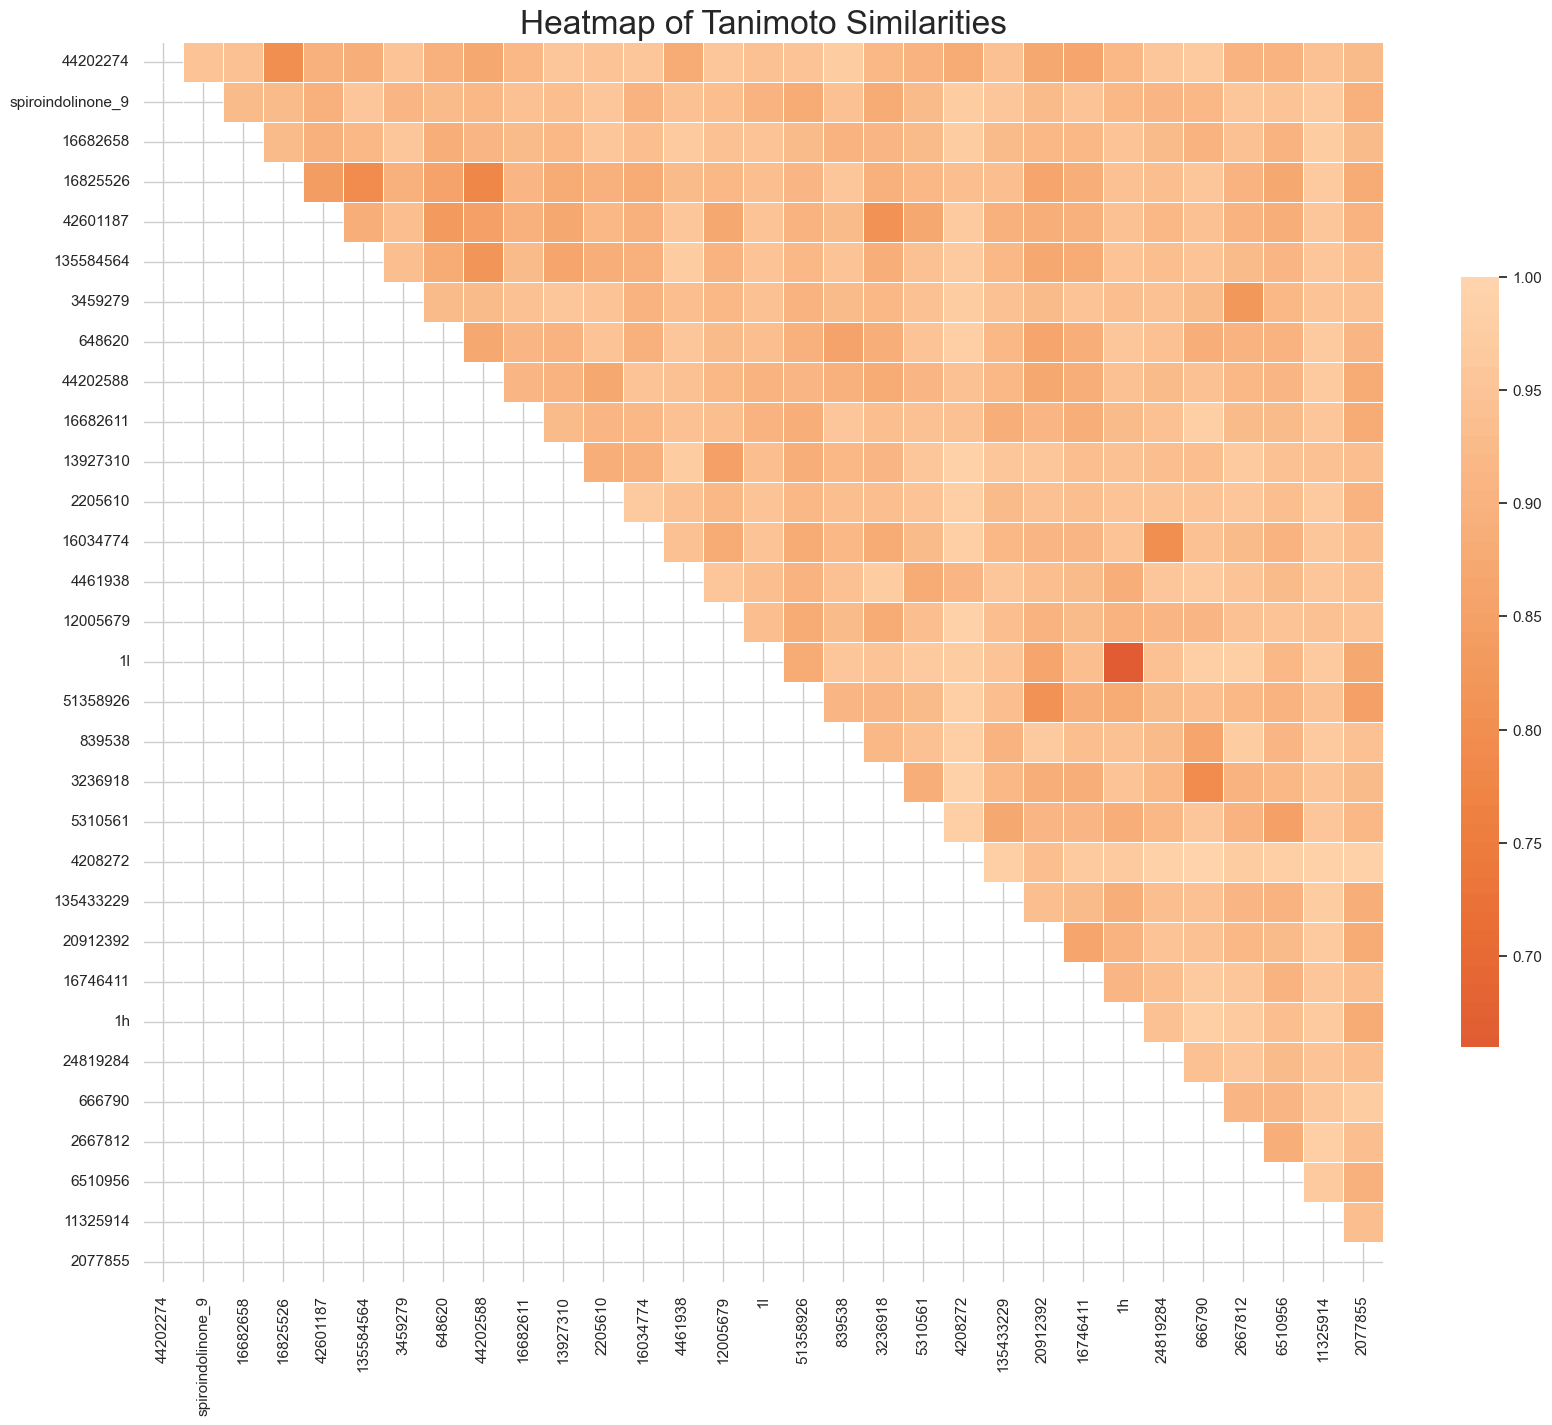

In [16]:
from mhfp.encoder import MHFPEncoder

def tanimoto(vector1, vector2):
        a = np.where(vector1 == 1)[0]
        b = np.where(vector2 == 1)[0]
        tani = len(np.intersect1d(a, b)) / (float(len(a) + len(b)) - len(np.intersect1d(a, b)))
        return tani


def tanimoto_heatmap(data):
    smiles = [Chem.MolToSmiles(mol) for mol in data]
    fingerprints = [MHFPEncoder.secfp_from_smiles(smile) for smile in smiles]
    size = len(fingerprints)
    hmap = np.empty(shape=(size, size))
    similarity_table = pd.DataFrame()
    for index, i in enumerate(fingerprints):
        for jindex, j in enumerate(fingerprints):
            distance = 1-tanimoto(i, j)
            hmap[index, jindex] = distance
            similarity_table.loc[data[index].GetProp("_Name"), data[jindex].GetProp("_Name")] = distance

    #sns.set(font_scale=1)
    plt.figure(figsize=(20, 20))
    corr = similarity_table.corr()
    mask = np.tril(np.ones_like(corr, dtype=bool))
    fig = sns.heatmap(similarity_table, annot = False, annot_kws={"fontsize":10}, center=0,
                    square=True,  linewidths=0.5, cbar_kws={"shrink": .5},mask=mask)

    plt.title('Heatmap of Tanimoto Similarities', fontsize = 24)
    #Saving
    # folder = str('./Cluster_images')
    # isExist = os.path.exists(folder)
    # if not isExist:
    #     os.makedirs(folder)
    # save_dir = folder+'/'
    # plt.savefig(save_dir+'heatmap_tanimoto.png', dpi=600, bbox_inches='tight')
    # plt.show()

    return hmap, similarity_table

similarity_table = tanimoto_heatmap(cluster_centers)

